<a href="https://colab.research.google.com/github/samratrcs/IntroductionToTensorflow/blob/Week_2/Fashion_MNIST_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_data, training_label), (test_data, test_label) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
index = 4260

In [5]:
np.set_printoptions(linewidth = 320)

In [6]:
print("Label: " + str(training_label[index]))
print(training_data[index])

Label: 8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 108 203  74   0   2   0   0   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  74  36  15 255   2   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   9 128   0   0  94 149   0   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   6   0 123 130   0   0   0 192   0   0   2   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0 152  70   0   0   0 148  27   0   5   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 178   4   0   0   0 146  84   0   5   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0  80 169   0   0   5   0 128 141   0   9   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0 127 144   0   0   8   0 101 181   0   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 162 113   0   0   2   0  

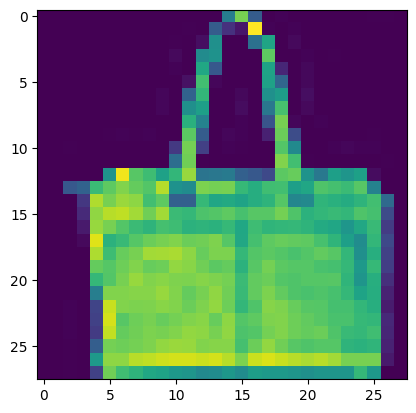

In [7]:
plt.imshow(training_data[index])

## Normalizing the dataset between 0 an 1 by dividing all the pixels with 255


In [8]:
training_data = training_data/255.0
test_data = test_data/255.0

# Building the classification Model using Neural Network

In [9]:
model = tf.keras.Sequential([##tf.keras.layers.Dense(units=1, input_shape=[28,28]),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)]
                            )

In [10]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(training_data, training_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4728 - accuracy: 0.8318
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3577 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3209 - accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2992 - accuracy: 0.8890
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2802 - accuracy: 0.8961


In [11]:
model.evaluate(test_data, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8779


[0.33863797783851624, 0.8779000043869019]

In [4]:
classifications = model.predict(test_data)

print(classifications[0])
print(test_label[0])

NameError: ignored

In case you want to predict for one input row this is how it is done below.
The input has to be passed through a numpy array first and then it has to be passed through the predict function.

In [13]:
classifications = model.predict(np.array([test_data[0]]))

1/1 [==============================] - 0s 21ms/step


In [14]:
print(classifications)
print(np.max(classifications))
print(np.argmax(classifications))

[[9.1334965e-07 4.5581090e-09 6.5449495e-09 7.9058076e-09 5.5068083e-09 5.8635388e-04 3.8789029e-08 5.6890096e-03 1.3436802e-07 9.9372357e-01]]
0.9937236
9


# Callbacks

In [15]:
class callbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(logs)

    if(logs.get('accuracy') > 0.6):
    #if(logs.get('loss') < 0.6):
      print("Model loss has gone below threshold of 0.6")
      self.model.stop_training = True


callBack = callbacks()

In [16]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units = 512, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_data, training_label, epochs=10, callbacks=[callBack])

Epoch 1/10
1870/1875 [============================>.] - ETA: 0s - loss: 4.5234 - accuracy: 0.7625{'loss': 4.513705730438232, 'accuracy': 0.762499988079071}
Model loss has gone below threshold of 0.6
1875/1875 [==============================] - 12s 6ms/step - loss: 4.5137 - accuracy: 0.7625
